# **Car Price Prediction**

---

The prices of new cars in the industry is fixed by the manufacturer.
So, customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a global increase.There is a need for a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Using this notebook we can train a model to predict a car price on the basis of there feature.


*   Justifications during data cleaning(Identifying null values, filling missing values and removing outliers)
*   Exploratory Data Analysis (EDA)
*   Performing machine learning models: Random Forest, Linear Regression
*   Comparison of the performance of the models
*   Feature Selection using p-value
*   Reporting the findings of the study in notebook's final result
*   Single User Input Data






In [1]:
# importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

import statsmodels.api as sm

import pickle
from sklearn.externals import joblib


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df= pd.read_csv('cars_price.csv',index_col=0)            #load data

In [ ]:
os.getcwd()

'C:\\Users\\Code_love_r\\Desktop\\Mechademy\\Car price prediction'

In [ ]:
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [ ]:
# Observe the data using describe function

df.describe().T

,count,mean,std,min,25%,50%,75%,max
priceUSD,40000.0,7430.383775,8338.242134,95.0,2350.0,5350.0,9850.0,195000.0
year,40000.0,2003.485625,8.114896,1938.0,1998.0,2004.0,2010.0,2019.0
mileage(kilometers),40000.0,243433.200218,316703.266582,0.0,137000.0,228000.0,308761.0,9999999.0
volume(cm3),39970.0,2103.201676,938.724653,500.0,1600.0,1995.0,2300.0,20000.0


**OBSERVATION**


*   Minimum Price of Car is 95 USD and maximum price is 195000 USD.
*   Given Data is from 1938 to 2019.
*   Minimum mileage(kilometers) is 0.







In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 12 columns):
make                   40000 non-null object
model                  40000 non-null object
priceUSD               40000 non-null int64
year                   40000 non-null int64
condition              40000 non-null object
mileage(kilometers)    40000 non-null float64
fuel_type              40000 non-null object
volume(cm3)            39970 non-null float64
color                  40000 non-null object
transmission           40000 non-null object
drive_unit             38655 non-null object
segment                36245 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 4.0+ MB


## **Data Cleaning and pre-processing**

In [ ]:
#missing data
df.isnull().sum().sort_values(ascending=False)

segment                3755
drive_unit             1345
volume(cm3)              30
transmission              0
color                     0
fuel_type                 0
mileage(kilometers)       0
condition                 0
year                      0
priceUSD                  0
model                     0
make                      0
dtype: int64

In given Dataset, three columns have missing values
1.   segment
2.   drive unit
3.   volume(cm3)

So, we need to fill or drop these missing values.In this case i will drop the rows with missing values.



In [ ]:
df.dropna(inplace=True)

Check the number of duplicates in the dataset and after that remove the duplicates.

In [ ]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(45, 12)

As we can see, there are 45 duplicate rows in this dataset which I will remove from the dataset.

In [ ]:
df = df[~df.duplicated()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34971 entries, 0 to 39999
Data columns (total 12 columns):
make                   34971 non-null object
model                  34971 non-null object
priceUSD               34971 non-null int64
year                   34971 non-null int64
condition              34971 non-null object
mileage(kilometers)    34971 non-null float64
fuel_type              34971 non-null object
volume(cm3)            34971 non-null float64
color                  34971 non-null object
transmission           34971 non-null object
drive_unit             34971 non-null object
segment                34971 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 3.5+ MB


In [ ]:
df.nunique()

make                     51
model                   458
priceUSD               2328
year                     62
condition                 3
mileage(kilometers)    5755
fuel_type                 2
volume(cm3)             352
color                    13
transmission              2
drive_unit                4
segment                   9
dtype: int64

**Outlier**

As we saw earlier that few of the cars have mileage as zero which may not be correct.

In [ ]:
df[df['mileage(kilometers)']==0].count()

make                   98
model                  98
priceUSD               98
year                   98
condition              98
mileage(kilometers)    98
fuel_type              98
volume(cm3)            98
color                  98
transmission           98
drive_unit             98
segment                98
dtype: int64

There are 98 rows with 0 value as mileage.

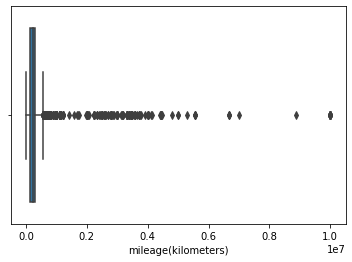

In [ ]:
sns.boxplot(x=df['mileage(kilometers)'])

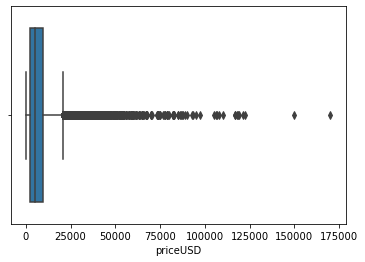

In [ ]:
sns.boxplot(x=df['priceUSD'])

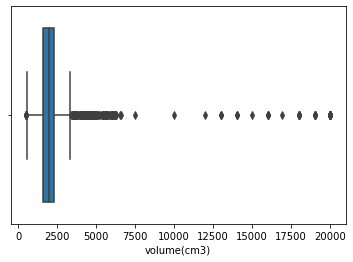

In [ ]:
sns.boxplot(x=df['volume(cm3)'])

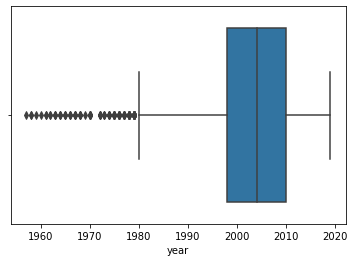

In [ ]:
sns.boxplot(x=df['year'])

As we can notice from the boxplots, we don't only have very low points but we also have a lot of high points.

In order to detect and remove outliers we are going to use a technique called "IQR score technique".

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

priceUSD                 7400.0
year                       12.0
mileage(kilometers)    170417.0
volume(cm3)               700.0
dtype: float64


In [ ]:
df['priceUSD']=df['priceUSD'].astype(float)
df['year'] = df['year'].astype(float)
df['mileage(kilometers)']= df['mileage(kilometers)'].astype(float)
df['volume(cm3)'] = df['volume(cm3)'].astype(float)

In [ ]:
df = df[~((df[['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)']] < (Q1-1.5 * IQR)) |(df[['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)']] > (Q3 + 1.5 * IQR))).any(axis=1)]  #remove outliers from dataset
df.shape

(31404, 12)

In [ ]:
df[df['mileage(kilometers)']==0].count()

make                   87
model                  87
priceUSD               87
year                   87
condition              87
mileage(kilometers)    87
fuel_type              87
volume(cm3)            87
color                  87
transmission           87
drive_unit             87
segment                87
dtype: int64

We haven't deleted all rows where the mileage is equal to 0, but deleted 11 of them.

## **Exploratory Data Analysis (EDA)**

EDA helps in better data understanding by visualizing, summarizing and interpreting the information that is hidden in data.

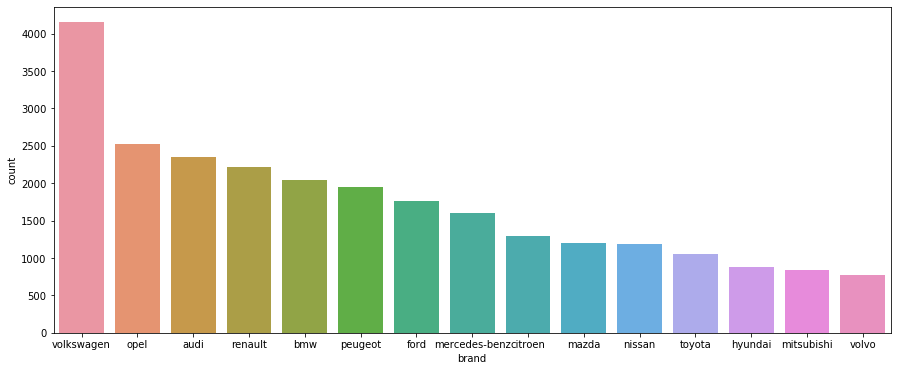

In [ ]:
brand_of_car = df.groupby('make')['model'].count().reset_index().sort_values('model',ascending = False).head(15)
brand_of_car = brand_of_car.rename(columns = {'make':'brand','model':'count'})
fig,ax=plt.subplots(figsize=(15,6))
sns.barplot(data=brand_of_car, x='brand',y='count', ax=ax)

Cleary Volkswagen is most comman brand followed by opel,audi and others in the given dataset.

Text(0.5, 0, 'Year')

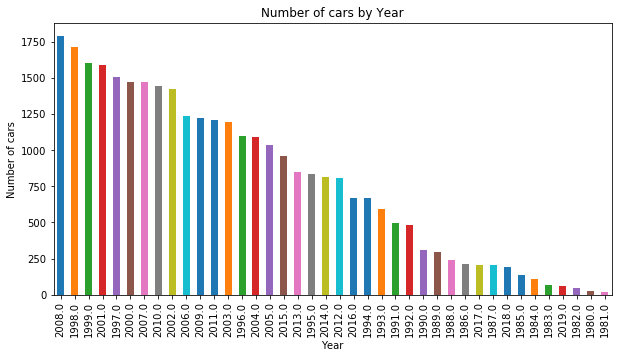

In [ ]:
df['year'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Year")
plt.ylabel("Number of cars")
plt.xlabel("Year")

Highest number of cars in dataset is from 2008

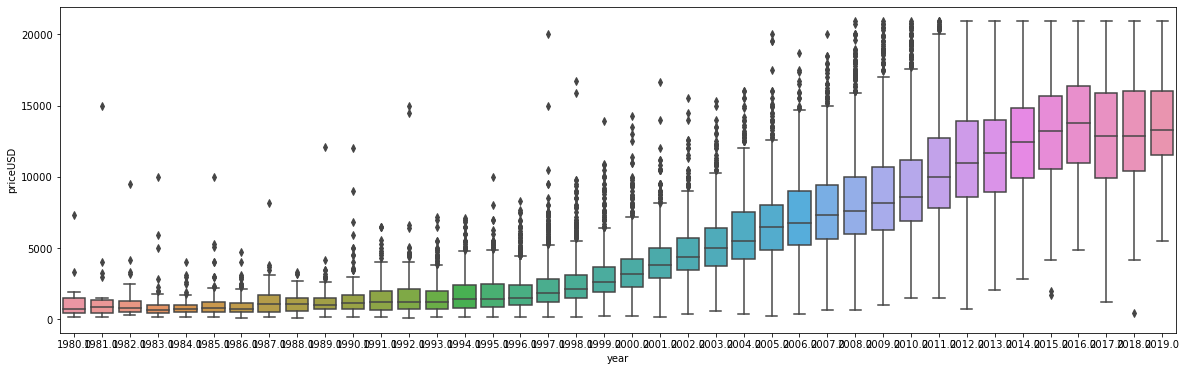

In [ ]:
#year vs price

plt.figure(figsize=(20,6))
sns.boxplot(y=df['priceUSD'], x=df['year'])

Clearly, it's a strong tendency.

Price of Newest is high as compared to old models.

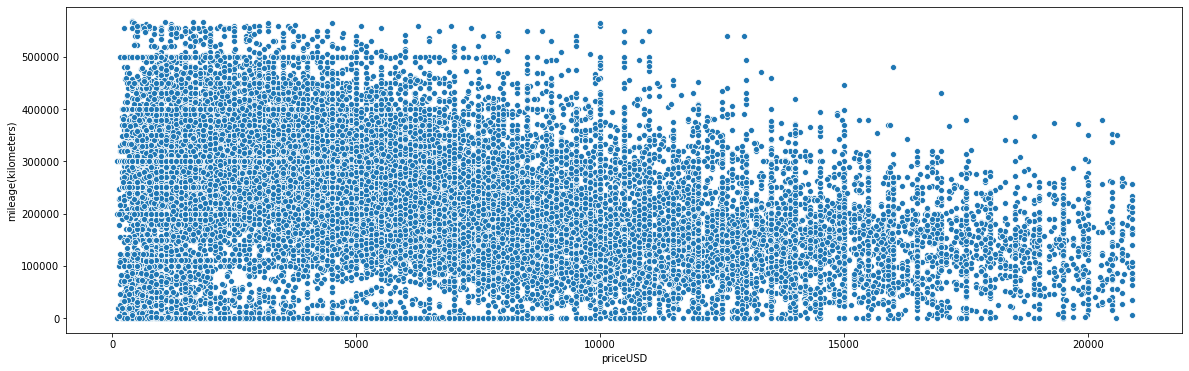

In [ ]:
#mileage vs price

plt.figure(figsize=(20,6))
sns.scatterplot(x=df['priceUSD'], y=df['mileage(kilometers)'])

Overall Less expensive cars has more mileage as compare to highly expensive cars.

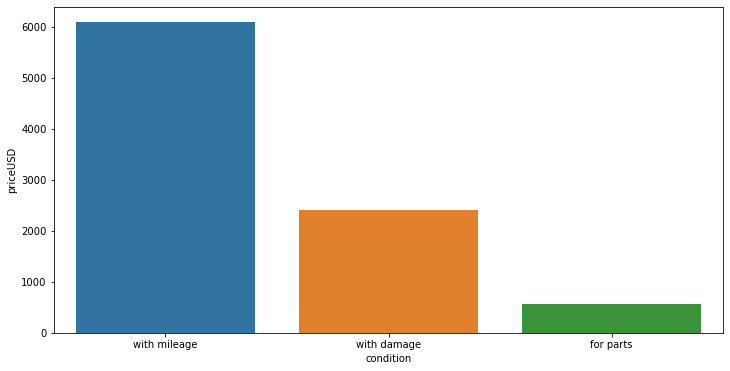

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['condition'], y=df['priceUSD'],ci=None)

Damaged cars have less price than one with in good condition whereas cars which can be used for parts after buying is of lowest price.
As the information from the dataset through this graph condition is one of the most important feature for price prediction.

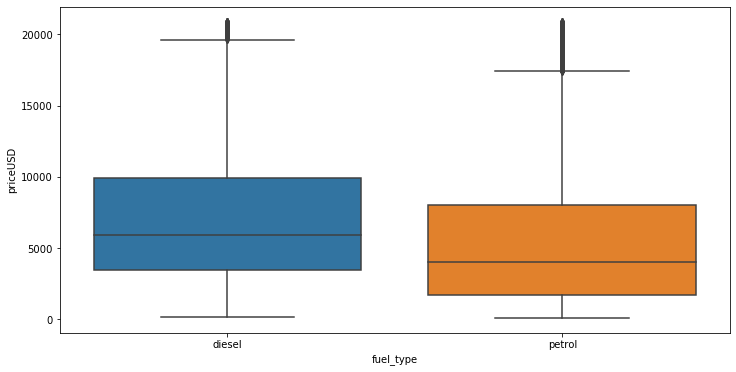

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['priceUSD'], x=df['fuel_type'])

As, we thought diseal car is more expensive as compare to petrol car.

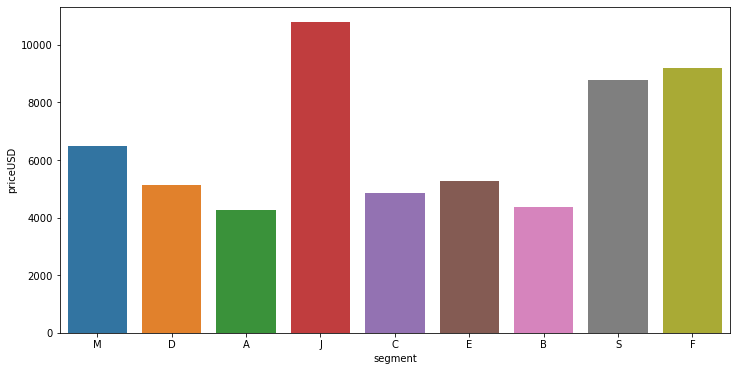

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['segment'], y=df['priceUSD'],ci=None)

C:\Users\Code_love_r\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


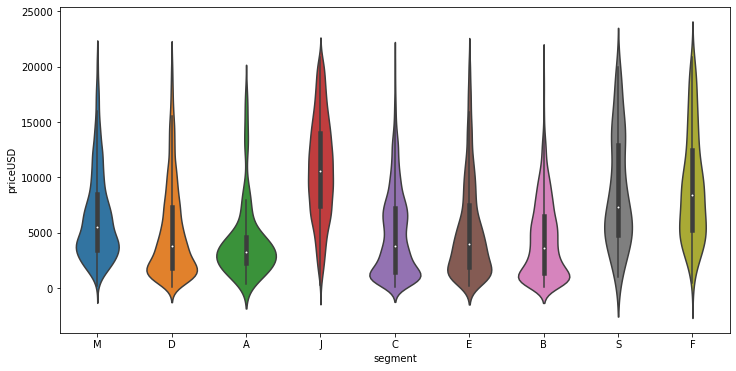

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df['segment'], y=df['priceUSD'])

After seeing above two graphs, its clear that segment-J car's price range is highest followed by segment-S car's. Segment-J,S,F cars in the dataset is nearly of all prices or you can say normally distributed whereas others segments cars price are concentrated between some range  

Black,gray,white,brown and silver colour car is present in all price range

,priceUSD,year,mileage(kilometers),volume(cm3)
priceUSD,1.000000,0.798456,-0.349542,0.225421
year,0.798456,1.000000,-0.431562,-0.069314
mileage(kilometers),-0.349542,-0.431562,1.000000,0.232888
volume(cm3),0.225421,-0.069314,0.232888,1.000000


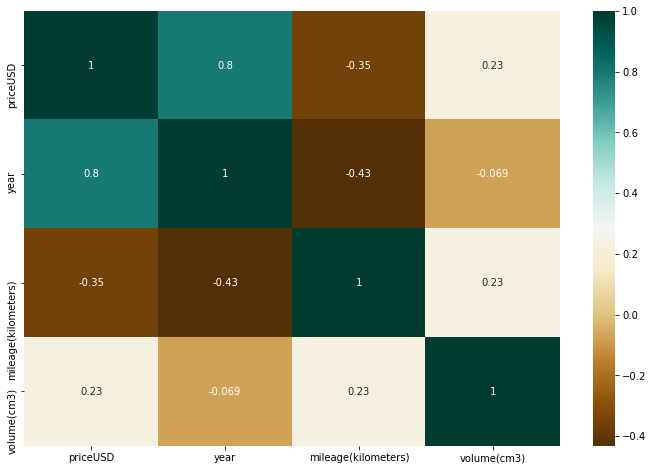

In [ ]:
# Finding the relations between the variables using heatmap
plt.figure(figsize=(12,8))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In the above heat map we know that the price feature depends mainly on the year and the mileage as positive and negative corelation respectively.

Now,

Let's delete all useless features, I will remove two column make and model as it contains only car brands and its models name which will not add much value in prediction.

In [ ]:
df.drop(["make"],axis=1,inplace=True)
df.drop(["model"],axis=1,inplace=True)

In [ ]:
df.head()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
1,5550.0,2008.0,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,8300.0,2008.0,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3300.0,2005.0,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,2450.0,2002.0,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
5,18900.0,2016.0,with mileage,148000.0,diesel,1600.0,black,mechanics,front-wheel drive,J


###### **Working with Categorical Data**


As for now we have left with only 6 categorical features:



1.   model
2.   condition
3.   Fuel_Type
4.   transmission
5.   segment
6.   color
7.   drive_unit


For handeling categorical data. We mostly use these 2 path:



*   OneHotEncoder
*   LabelEncoder


Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

In this case I will use pandas get_dummies feature for handling categorical data.



**Working for Fuel_Type**

In [ ]:
Fuel_t = df[['fuel_type']]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,fuel_type_petrol
1,0
2,1
3,1
4,0
5,0


**Working for condition**

In [ ]:
condition = df[['condition']]
condition = pd.get_dummies(condition,drop_first=True)
condition.head()

,condition_with damage,condition_with mileage
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1


**Working for transmission**

In [ ]:
Transmission = df[['transmission']]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,transmission_mechanics
1,1
2,0
3,1
4,1
5,1


**Working for segment**

In [ ]:
segment = df[['segment']]
segment = pd.get_dummies(segment,drop_first=True)
segment.head()

,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0


**Working for color**

In [ ]:
color = df[['color']]
color = pd.get_dummies(color,drop_first=True)
color.head()

,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0


**Working for drive_unit**

In [ ]:
drive_unit = df[['drive_unit']]
drive_unit = pd.get_dummies(drive_unit,drop_first=True)
drive_unit.head()

,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [ ]:
final_df= pd.concat([df,condition,Fuel_t,Transmission,color,segment,drive_unit],axis=1)
final_df.head()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,...,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
1,5550.0,2008.0,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,...,0,0,0,0,0,1,0,1,0,0
2,8300.0,2008.0,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,...,0,1,0,0,0,0,0,1,0,0
3,3300.0,2005.0,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,...,0,0,0,0,0,0,0,1,0,0
4,2450.0,2002.0,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,...,0,1,0,0,0,0,0,1,0,0
5,18900.0,2016.0,with mileage,148000.0,diesel,1600.0,black,mechanics,front-wheel drive,J,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
final_df.drop(["condition","fuel_type","transmission","color","segment","drive_unit"],axis=1,inplace=True)

In [ ]:
final_df.head()

,priceUSD,year,mileage(kilometers),volume(cm3),condition_with damage,condition_with mileage,fuel_type_petrol,transmission_mechanics,color_blue,color_brown,...,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
1,5550.0,2008.0,172000.0,1400.0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,8300.0,2008.0,223000.0,2500.0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3300.0,2005.0,140000.0,1200.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2450.0,2002.0,413000.0,2200.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
5,18900.0,2016.0,148000.0,1600.0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
X = final_df.iloc[:,1:]
X.head()

,year,mileage(kilometers),volume(cm3),condition_with damage,condition_with mileage,fuel_type_petrol,transmission_mechanics,color_blue,color_brown,color_burgundy,...,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive
1,2008.0,172000.0,1400.0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2008.0,223000.0,2500.0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2005.0,140000.0,1200.0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2002.0,413000.0,2200.0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,2016.0,148000.0,1600.0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
y = final_df.iloc[:,[0]]
y.head()

,priceUSD
1,5550.0
2,8300.0
3,3300.0
4,2450.0
5,18900.0


## **Machine learning models**
First we are spliting the data to train and test for the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# from sklearn import preprocessing
# mm_scaler = preprocessing.MinMaxScaler()
# X_train = mm_scaler.fit_transform(X_train)
# X_test =mm_scaler.transform(X_test)                      # comment the feature scaling section because it does not help to increase accuracy,
                                                           #if you want to use ,please uncomment and run

**Linear regression**

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared           : ', r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1632.648622172583
Mean Squared  Error      :  4757383.325634388
Root Mean Squared  Error :  2181.1426651263296
R Squared           :  0.7775104172286407


Not a good score, let's try something more better.

Now I am using  ExtraTrees Regressor and Random Forest Regressor (obviously for better accuracy)


**ExtraTrees Regressor**

In [ ]:
ext_reg = ExtraTreesRegressor()
ext_reg.fit(X_train, y_train)
y_pred= ext_reg.predict(X_test)

print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared           : ', r2_score(y_test, y_pred))

C:\Users\Code_love_r\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


		Error Table
Mean Absolute Error      :  1087.5910742716128
Mean Squared  Error      :  2467912.460573866
Root Mean Squared  Error :  1570.9590894017151
R Squared           :  0.8845826001216543


**Random Forest**

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared           : ', r2_score(y_test, y_pred))

C:\Users\Code_love_r\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


		Error Table
Mean Absolute Error      :  1016.1789399189544
Mean Squared  Error      :  2124343.4489508905
Root Mean Squared  Error :  1457.512761162279
R Squared           :  0.9006503669625723


0.9 is a Good R2 Score

In [ ]:
#joblib.dump(rf_reg, 'filename.pkl') 
pickle.dump(linear_reg, open('model.pkl','wb'))

In [ ]:
#model1 = joblib.load('filename.pkl')  
model1 = pickle.load((open('model.pkl','rb')))

In [ ]:
model1.predict(X_test)

array([[ 6041.57757638],
       [15072.8365593 ],
       [10714.05355203],
       ...,
       [ 7856.72208442],
       [ 3080.5770542 ],
       [ 2529.0859678 ]])

## **Feature Selection using p-value**

So in Regression very frequently used techniques for feature selection are as following:


*   Stepwise Regression
*   Forward Selection
*   Backward Elimination

I will use Backward elimination in this case.
In backward elimination in the first step we include all predictors and in subsequent steps, keep on removing the one which has the highest p-value (>.05 the threshold limit). after a few iterations, it will produce the final set of features which are enough significant to predict the outcome with the desired accuracy.

In [ ]:
final_df.columns

Index(['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)',
       'condition_with damage', 'condition_with mileage', 'fuel_type_petrol',
       'transmission_mechanics', 'color_blue', 'color_brown', 'color_burgundy',
       'color_gray', 'color_green', 'color_orange', 'color_other',
       'color_purple', 'color_red', 'color_silver', 'color_white',
       'color_yellow', 'segment_B', 'segment_C', 'segment_D', 'segment_E',
       'segment_F', 'segment_J', 'segment_M', 'segment_S',
       'drive_unit_front-wheel drive', 'drive_unit_part-time four-wheel drive',
       'drive_unit_rear drive'],
      dtype='object')

In [ ]:
X_opt = X.values
regressor_OLS = sm.OLS(endog = y.values, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2503.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:41:48   Log-Likelihood:            -3.5420e+05
No. Observations:               34971   AIC:                         7.085e+05
Df Residuals:                   34941   BIC:                         7.087e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.0060      0.272     29.456      0.000       7.473       8.539
x2            -0.0029      0.000    -27.356      0.000      -0.003      -0.003
x3             0.1330      0.043      3.129      0.002       0.050       0.216
x4         -1412.8040    531.210     -2.660      0.008   -2453.993    -371.615
x5          1549.7229    380.806      4.070      0.000     803.330    2296.116
x6         -1926.2565     71.358    -26.994      0.000   -2066.121   -1786.392
x7         -4488.2411     81.102    -55.341      0.000   -4647.203   -4329.279
x8         -2444.2196    112.624    -21.703      0.000   -2664.965   -2223.474
x9          1716.6580    224.828      7.635      0.000    1275.989    2157.328
x10        -3095.8859    185.854    -16.658      0.000   -3460.166   -2731.606
x11         -846.5347    122.945     -6.885      0.000   -1087.511    -605.559
x12        -3830.7400    145.592    -26.312      0.000   -4116.104   -3545.376
x13        -1655.3790    561.533     -2.948      0.003   -2756.001    -554.757
x14        -1946.4219    151.911    -12.813      0.000   -2244.172   -1648.672
x15        -3125.3156    315.329     -9.911      0.000   -3743.370   -2507.261
x16        -2350.5326    167.345    -14.046      0.000   -2678.534   -2022.531
x17        -2335.8389    104.535    -22.345      0.000   -2540.731   -2130.947
x18          184.0600    127.756      1.441      0.150     -66.345     434.465
x19        -1553.0026    472.111     -3.289      0.001   -2478.356    -627.649
x20         -835.4951    360.161     -2.320      0.020   -1541.423    -129.567
x21         -806.1668    350.003     -2.303      0.021   -1492.184    -120.150
x22         -718.8630    349.734     -2.055      0.040   -1404.353     -33.372
x23         -832.1883    361.522     -2.302      0.021   -1540.782    -123.595
x24         -367.5513    438.002     -0.839      0.401   -1226.050     490.947
x25         2856.4474    369.304      7.735      0.000    2132.600    3580.295
x26          841.4215    357.060      2.357      0.018     141.572    1541.270
x27         6508.1466    451.376     14.418      0.000    5623.434    7392.859
x28        -4841.5888    148.351    -32.636      0.000   -5132.362   -4550.815
x29        -4035.9207    168.974    -23.885      0.000   -4367.115   -3704.726
x30        -5584.7485    166.087    -33.626      0.000   -5910.284   -5259.213
==============================================================================
Omnibus:                    36684.021   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5529468.972
Skew:                           4.990   Prob(JB):                         0.00
Kurtosis:                      63.788   Cond. No.                     1.21e+07
==============================================================================

W

Removing the highest p-value(x4 or fourth column) and rewriting the code.

In [ ]:
X_opt = X.values[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
regressor_OLS = sm.OLS(endog = y.values, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2588.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:41:48   Log-Likelihood:            -3.5420e+05
No. Observations:               34971   AIC:                         7.085e+05
Df Residuals:                   34942   BIC:                         7.087e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.6511      0.237     32.311      0.000       7.187       8.115
x2            -0.0029      0.000    -27.314      0.000      -0.003      -0.003
x3             0.1329      0.043      3.127      0.002       0.050       0.216
x4          2267.1964    268.796      8.435      0.000    1740.348    2794.045
x5         -1926.3059     71.364    -26.993      0.000   -2066.182   -1786.429
x6         -4487.9185     81.109    -55.332      0.000   -4646.894   -4328.943
x7         -2444.3010    112.633    -21.701      0.000   -2665.066   -2223.536
x8          1720.2505    224.843      7.651      0.000    1279.551    2160.950
x9         -3095.0662    185.870    -16.652      0.000   -3459.377   -2730.755
x10         -847.7022    122.955     -6.894      0.000   -1088.698    -606.707
x11        -3829.6590    145.604    -26.302      0.000   -4115.047   -3544.271
x12        -1655.2131    561.581     -2.947      0.003   -2755.930    -554.496
x13        -1947.0443    151.924    -12.816      0.000   -2244.820   -1649.269
x14        -3126.6844    315.356     -9.915      0.000   -3744.791   -2508.577
x15        -2344.4418    167.344    -14.010      0.000   -2672.441   -2016.442
x16        -2338.1725    104.540    -22.366      0.000   -2543.075   -2133.270
x17          185.5552    127.765      1.452      0.146     -64.869     435.980
x18        -1563.7412    472.135     -3.312      0.001   -2489.141    -638.341
x19         -841.3139    360.186     -2.336      0.020   -1547.290    -135.338
x20         -810.3532    350.030     -2.315      0.021   -1496.423    -124.284
x21         -725.9161    349.755     -2.076      0.038   -1411.446     -40.386
x22         -840.5416    361.539     -2.325      0.020   -1549.170    -131.913
x23         -381.6632    438.008     -0.871      0.384   -1240.173     476.847
x24         2849.3499    369.326      7.715      0.000    2125.458    3573.241
x25          833.3567    357.078      2.334      0.020     133.472    1533.241
x26         6498.4220    451.401     14.396      0.000    5613.662    7383.182
x27        -4842.1896    148.364    -32.637      0.000   -5132.988   -4551.391
x28        -4037.3334    168.988    -23.891      0.000   -4368.555   -3706.111
x29        -5585.2455    166.101    -33.626      0.000   -5910.809   -5259.682
==============================================================================
Omnibus:                    36685.413   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5529360.381
Skew:                           4.991   Prob(JB):                         0.00
Kurtosis:                      63.787   Cond. No.                     1.21e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is


Removing the highest p-value(x19 or 20th column) and rewriting the code.

In [ ]:
X_opt = X.values[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29]]
regressor_OLS = sm.OLS(endog = y.values, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2680.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:41:48   Log-Likelihood:            -3.5421e+05
No. Observations:               34971   AIC:                         7.085e+05
Df Residuals:                   34943   BIC:                         7.087e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.2746      0.173     41.929      0.000       6.935       7.615
x2            -0.0029      0.000    -27.329      0.000      -0.003      -0.003
x3             0.1307      0.043      3.075      0.002       0.047       0.214
x4          2272.9778    268.802      8.456      0.000    1746.118    2799.838
x5         -1928.7570     71.361    -27.028      0.000   -2068.627   -1788.887
x6         -4495.4195     81.050    -55.464      0.000   -4654.281   -4336.558
x7         -2445.4150    112.639    -21.710      0.000   -2666.192   -2224.638
x8          1713.9934    224.842      7.623      0.000    1273.297    2154.690
x9         -3094.7227    185.882    -16.649      0.000   -3459.057   -2730.389
x10         -852.8311    122.943     -6.937      0.000   -1093.803    -611.859
x11        -3833.0641    145.606    -26.325      0.000   -4118.456   -3547.672
x12        -1662.3421    561.609     -2.960      0.003   -2763.113    -561.571
x13        -1948.8471    151.932    -12.827      0.000   -2246.638   -1651.056
x14        -3121.9223    315.369     -9.899      0.000   -3740.056   -2503.789
x15        -2348.3475    167.346    -14.033      0.000   -2676.352   -2020.344
x16        -2341.5062    104.537    -22.399      0.000   -2546.403   -2136.610
x17          181.2853    127.761      1.419      0.156     -69.129     431.700
x18        -1554.8737    472.150     -3.293      0.001   -2480.303    -629.445
x19          -50.6847    129.411     -0.392      0.695    -304.335     202.965
x20           34.1623    128.221      0.266      0.790    -217.154     285.479
x21          -78.4431    155.757     -0.504      0.615    -383.732     226.846
x22          382.2488    291.378      1.312      0.190    -188.862     953.360
x23         3610.6990    173.671     20.790      0.000    3270.298    3951.100
x24         1593.5675    146.904     10.848      0.000    1305.631    1881.504
x25         7263.9871    310.404     23.402      0.000    6655.585    7872.389
x26        -4839.0848    148.368    -32.615      0.000   -5129.890   -4548.279
x27        -4036.5794    168.999    -23.885      0.000   -4367.822   -3705.337
x28        -5591.4652    166.090    -33.665      0.000   -5917.007   -5265.923
==============================================================================
Omnibus:                    36684.447   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5527446.537
Skew:                           4.991   Prob(JB):                         0.00
Kurtosis:                      63.776   Cond. No.                     6.88e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+06. This might i

New Adj. r-squared value : 81.9%
We can see our accuracy does not change a little bit after removing two columns  thus we will keep all the previous columns. Thus the final_df is the relevant dataframe to train model and also random forest regressor give good result ,so i will use randomforest regressor

## **Final Result**

> From all analysis i understand that final_df is the relevant dataframe to train model and also random forest regressor give good result ,so i will use random forest regressor.



In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared           : ', r2_score(y_test, y_pred))

C:\Users\Code_love_r\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


		Error Table
Mean Absolute Error      :  1335.3914352215609
Mean Squared  Error      :  6324732.219475472
Root Mean Squared  Error :  2514.902029796682
R Squared           :  0.896030967397477


We get an R2 score of 0.90 with Random forest regressor

## **Car price prediction for single user Input Data**

> Here we can predict the price of a single car to be sold using above trained model, by taking the features of that car as an input.


> By making few changes in code of below cells we can make predictions of multiple cars at once. But for now, I predict the price of a single car at a time for  user input data.





In [ ]:
def pre_processing_usertestcase(test_df):   #preprocess the test data
  test_df.dropna(inplace=True)
  duplicate_rows_testdf = test_df[test_df.duplicated()]
  duplicate_rows_testdf.shape
  test_df = test_df[~test_df.duplicated()]
  return test_df

def remove_outlier(test_df):    #remove all outliers, used when multipe data or dataframe withe multiple rows.
  Q1 = test_df.quantile(0.25)
  Q3 = test_df.quantile(0.75)
  IQR = Q3 - Q1
  test_df = test_df[~((test_df < (Q1-1.5 * IQR)) |(test_df > (Q3 + 1.5 * IQR))).any(axis=1)]
  return test_df

def drop(test_df):
  test_df.drop(["make"],axis=1,inplace=True)
  test_df.drop(["model"],axis=1,inplace=True)
  return test_df

def handle_categorical(test_df):           #this  function will handle all categorical features
  fuel_type_val= 'fuel_type' + '_' + test_df['fuel_type'][0]
  if fuel_type_val in test_df.columns:
    test_df[fuel_type_val] = 1             #replace 0 with 1 where the condition satifies or category meet

  condition_val= 'condition' + '_' + test_df['condition'][0]
  if condition_val in test_df.columns:
    test_df[condition_val] = 1

  transmission_val= 'transmission' + '_' + test_df['transmission'][0]
  if transmission_val in test_df.columns:
    test_df[transmission_val] = 1

  segment_val= 'segment' + '_' + test_df['segment'][0]
  if segment_val in test_df.columns:
    test_df[segment_val] = 1

  color_val= 'color' + '_' + test_df['color'][0]
  if color_val in test_df.columns:
    test_df[color_val] = 1

  drive_unit_val= 'drive_unit' + '_' + test_df['drive_unit'][0]
  if drive_unit_val in test_df.columns:
    test_df[drive_unit_val] = 1
  test_df.drop(["condition","fuel_type","transmission","color","segment","drive_unit"],axis=1,inplace=True)
  
  return test_df
  


Taking all the necessary details of a car as an input used for price prediction. 

In [ ]:
print("Enter the car company brand")
make=input()
print("Enter the car model")
model=input()
print("Enter the year")
year=int(input())
print("Enter the condition of car")
condition=input()
print("Enter the mileage in kilometers")
mileage=int(input())
print("Enter the fuel type for car")
fuel_type=input()
print("Enter volume of car")
volume = int(input())
print("Enter colour of car")
color=input()
print("Enter transmision of car, mechanics or auto")
transmission=input()
print("Enter drive unit type")
drive_unit=input()
print("Enter segment type")
segment=input()


Enter the car company brand
Ford
Enter the car model
fusion
Enter the year
2008
Enter the condition of car
with_mileage
Enter the mileage in kilometers
200000
Enter the fuel type for car
petrol
Enter volume of car
20000
Enter colour of car
black
Enter transmision of car, mechanics or auto
auto
Enter drive unit type
front-wheel drive	
Enter segment type
A


converting input data taken in the form of proper dataframe format after all preprocessing and then predict using trained modelac 

In [ ]:
test_data ={'make':[make],'model':[model],'year':[year],'condition':[condition],'mileage(kilometers)':[mileage],'fuel_type':[fuel_type],'volume(cm3)':[volume],'color':[color],'transmission':[transmission],'drive_unit':[drive_unit],'segment':[segment]}
test_df = pd.DataFrame(test_data) 

#creating new dataframe for categorical feature and assuming all of them as 0 and replace it with 1 when handle categorical data through function calling. 
new_df = pd.DataFrame(np.zeros(shape=(1,len(X.columns[3:]))).astype(int),columns=(X.columns[3:])) 

#concat both data frames 
test_df = pd.concat([test_df,new_df],axis=1) 

#Comment below two lines of code because i taken a user input data for a single car price prediction. You may uncomment it when deal with more data.
# test_df = pre_processing_usertestcase(test_df)            
# test_df = remove_outlier(test_df)

test_df = drop(test_df)                #to drop unnecessary column
test_df = handle_categorical(test_df)  #for encoding of categorical variable

#make prediction using final data
y_pred= model1.predict(test_df)

print("Predicted price of a car is",y_pred[0],"USD")

Predicted price of a car is 11457.96 USD


As the model predict some price in each case, on the basis of features.

In [ ]:
model

'fusion'